In [81]:
import os
import numpy as np 
import math
import pandas as pd 
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, SimpleRNN
#"/Users/ismaelcastro/Documents/Computer Science/CS Classes/CS230/project/data.csv"
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# plt.style.use('fivethirtyeight')
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from numpy import concatenate

<h1>Make Multivariable Dataset</h1>
<h2>Load Chinook Data</h2>

In [82]:
def load_data(pathname):
    salmon_data = pd.read_csv(pathname)
    salmon_data.head()
    salmon_copy = salmon_data # Create a copy for us to work with 
    salmon_copy.rename(columns = {"mo": "month", "da" : "day", "fc" : "king"}, 
          inplace = True)
    salmon_copy['date']=pd.to_datetime(salmon_copy[['year','month','day']])
#     print(salmon_copy)
    king_data = salmon_copy.filter(["date","king"], axis=1)
#     print(king_data)
    king_greater = king_data['date'].apply(pd.Timestamp) >= pd.Timestamp('01/01/1939')
    greater_than = king_data[king_greater]
    king_all = greater_than[greater_than['date'].apply(pd.Timestamp) <= pd.Timestamp('12/31/2020')]
    king_all_copy = king_all
    king_all_copy = king_all_copy.reset_index()
    king_all_copy = king_all_copy.drop('index', axis=1)
    return king_all_copy, king_data

In [83]:
    chris_path = '/Users/chrisshell/Desktop/Stanford/SalmonData/Use Data/passBonCS.csv'
    ismael_path = '/Users/ismaelcastro/Documents/Computer Science/CS Classes/CS230/project/data.csv'
    abdul_path = '/Users/abdul/Downloads/SalmonNet/passBonCS.csv'
    king_all_copy, king_data= load_data(abdul_path)
    print(king_all_copy)

            date  king
0     1939-01-01     0
1     1939-01-02     0
2     1939-01-03     0
3     1939-01-04     1
4     1939-01-05     0
...          ...   ...
24364 2020-12-25     0
24365 2020-12-26     0
24366 2020-12-27     0
24367 2020-12-28     0
24368 2020-12-29     0

[24369 rows x 2 columns]


In [84]:
data_copy = king_all_copy
print(data_copy['date'])
data_copy.set_index('date', inplace=True)
data_copy.index = pd.to_datetime(data_copy.index)
data_copy = data_copy.resample('1M').sum()
data_copy

0       1939-01-01
1       1939-01-02
2       1939-01-03
3       1939-01-04
4       1939-01-05
           ...    
24364   2020-12-25
24365   2020-12-26
24366   2020-12-27
24367   2020-12-28
24368   2020-12-29
Name: date, Length: 24369, dtype: datetime64[ns]


,king
date,
1939-01-31,6
1939-02-28,12
1939-03-31,121
1939-04-30,51410
1939-05-31,25159
...,...
2020-08-31,105269
2020-09-30,254930
2020-10-31,30917


In [85]:
print(data_copy)
data_copy.shape

              king
date              
1939-01-31       6
1939-02-28      12
1939-03-31     121
1939-04-30   51410
1939-05-31   25159
...            ...
2020-08-31  105269
2020-09-30  254930
2020-10-31   30917
2020-11-30     843
2020-12-31       9

[984 rows x 1 columns]


(984, 1)

In [86]:
data_copy.reset_index(inplace=True)
data_copy = data_copy.rename(columns = {'index':'date'})

In [87]:
data_copy

,date,king
0,1939-01-31,6
1,1939-02-28,12
2,1939-03-31,121
3,1939-04-30,51410
4,1939-05-31,25159
...,...,...
979,2020-08-31,105269
980,2020-09-30,254930
981,2020-10-31,30917
982,2020-11-30,843


In [88]:
master_data = data_copy
master_data

,date,king
0,1939-01-31,6
1,1939-02-28,12
2,1939-03-31,121
3,1939-04-30,51410
4,1939-05-31,25159
...,...,...
979,2020-08-31,105269
980,2020-09-30,254930
981,2020-10-31,30917
982,2020-11-30,843


In [89]:
master_data = master_data[132:]

In [90]:
master_data

,date,king
132,1950-01-31,0
133,1950-02-28,0
134,1950-03-31,21
135,1950-04-30,6630
136,1950-05-31,50638
...,...,...
979,2020-08-31,105269
980,2020-09-30,254930
981,2020-10-31,30917
982,2020-11-30,843


In [91]:
master_data.reset_index(inplace=True)

In [92]:
master_data = master_data.drop(labels='index', axis=1)

In [93]:
print(master_data)

          date    king
0   1950-01-31       0
1   1950-02-28       0
2   1950-03-31      21
3   1950-04-30    6630
4   1950-05-31   50638
..         ...     ...
847 2020-08-31  105269
848 2020-09-30  254930
849 2020-10-31   30917
850 2020-11-30     843
851 2020-12-31       9

[852 rows x 2 columns]


In [94]:
# type(data_copy['date'])
# # data_copy['date'].astype(p)

<h2>Load Covariate Data and Concat to Master_Data</h2>

In [95]:
def load_cov_set(pathname):
    data = pd.read_csv(pathname)
    return data

In [96]:
ismael_path_cov = '/Users/ismaelcastro/Documents/Computer Science/CS Classes/CS230/project/covariates.csv'
chris_path_cov = '/Users/chrisshell/Desktop/Stanford/SalmonData/Environmental Variables/salmon_env_use.csv'
abdul_path_cov= '/Users/abdul/Downloads/SalmonNet/salmon_env_use.csv'
cov_data = load_cov_set(abdul_path_cov)
cov_data

,year,month,upwelling,noi,npgo,pdo,oni
0,1950,1,-16,2.644,-2.190,-1.61,-1.40
1,1950,2,-166,2.077,-1.450,-2.17,-1.20
2,1950,3,-49,3.091,-0.970,-1.89,-1.10
3,1950,4,-4,1.923,-0.860,-1.99,-1.20
4,1950,5,49,2.211,-0.630,-3.19,-1.10
...,...,...,...,...,...,...,...
847,2020,8,43,-0.463,-1.422,-1.32,-0.57
848,2020,9,-1,-0.276,-1.161,-1.03,-0.89
849,2020,10,10,1.612,-1.476,-0.62,-1.17
850,2020,11,-43,1.998,-1.710,-1.58,-1.27


In [97]:
upwelling = cov_data["upwelling"]
master_data = master_data.join(upwelling)
master_data

,date,king,upwelling
0,1950-01-31,0,-16
1,1950-02-28,0,-166
2,1950-03-31,21,-49
3,1950-04-30,6630,-4
4,1950-05-31,50638,49
...,...,...,...
847,2020-08-31,105269,43
848,2020-09-30,254930,-1
849,2020-10-31,30917,10
850,2020-11-30,843,-43


In [98]:
noi = cov_data["noi"]
master_data = master_data.join(noi)
master_data

,date,king,upwelling,noi
0,1950-01-31,0,-16,2.644
1,1950-02-28,0,-166,2.077
2,1950-03-31,21,-49,3.091
3,1950-04-30,6630,-4,1.923
4,1950-05-31,50638,49,2.211
...,...,...,...,...
847,2020-08-31,105269,43,-0.463
848,2020-09-30,254930,-1,-0.276
849,2020-10-31,30917,10,1.612
850,2020-11-30,843,-43,1.998


In [99]:
npgo = cov_data["npgo"]
master_data = master_data.join(npgo)
master_data

,date,king,upwelling,noi,npgo
0,1950-01-31,0,-16,2.644,-2.190
1,1950-02-28,0,-166,2.077,-1.450
2,1950-03-31,21,-49,3.091,-0.970
3,1950-04-30,6630,-4,1.923,-0.860
4,1950-05-31,50638,49,2.211,-0.630
...,...,...,...,...,...
847,2020-08-31,105269,43,-0.463,-1.422
848,2020-09-30,254930,-1,-0.276,-1.161
849,2020-10-31,30917,10,1.612,-1.476
850,2020-11-30,843,-43,1.998,-1.710


In [100]:
pdo = cov_data["pdo"]
master_data = master_data.join(pdo)
master_data

,date,king,upwelling,noi,npgo,pdo
0,1950-01-31,0,-16,2.644,-2.190,-1.61
1,1950-02-28,0,-166,2.077,-1.450,-2.17
2,1950-03-31,21,-49,3.091,-0.970,-1.89
3,1950-04-30,6630,-4,1.923,-0.860,-1.99
4,1950-05-31,50638,49,2.211,-0.630,-3.19
...,...,...,...,...,...,...
847,2020-08-31,105269,43,-0.463,-1.422,-1.32
848,2020-09-30,254930,-1,-0.276,-1.161,-1.03
849,2020-10-31,30917,10,1.612,-1.476,-0.62
850,2020-11-30,843,-43,1.998,-1.710,-1.58


In [101]:
oni = cov_data["oni "]
master_data = master_data.join(oni)
master_data
# cov_data.columns

,date,king,upwelling,noi,npgo,pdo,oni
0,1950-01-31,0,-16,2.644,-2.190,-1.61,-1.40
1,1950-02-28,0,-166,2.077,-1.450,-2.17,-1.20
2,1950-03-31,21,-49,3.091,-0.970,-1.89,-1.10
3,1950-04-30,6630,-4,1.923,-0.860,-1.99,-1.20
4,1950-05-31,50638,49,2.211,-0.630,-3.19,-1.10
...,...,...,...,...,...,...,...
847,2020-08-31,105269,43,-0.463,-1.422,-1.32,-0.57
848,2020-09-30,254930,-1,-0.276,-1.161,-1.03,-0.89
849,2020-10-31,30917,10,1.612,-1.476,-0.62,-1.17
850,2020-11-30,843,-43,1.998,-1.710,-1.58,-1.27


In [102]:
master_data = master_data.rename(columns={"oni ": "oni"})
master_data

,date,king,upwelling,noi,npgo,pdo,oni
0,1950-01-31,0,-16,2.644,-2.190,-1.61,-1.40
1,1950-02-28,0,-166,2.077,-1.450,-2.17,-1.20
2,1950-03-31,21,-49,3.091,-0.970,-1.89,-1.10
3,1950-04-30,6630,-4,1.923,-0.860,-1.99,-1.20
4,1950-05-31,50638,49,2.211,-0.630,-3.19,-1.10
...,...,...,...,...,...,...,...
847,2020-08-31,105269,43,-0.463,-1.422,-1.32,-0.57
848,2020-09-30,254930,-1,-0.276,-1.161,-1.03,-0.89
849,2020-10-31,30917,10,1.612,-1.476,-0.62,-1.17
850,2020-11-30,843,-43,1.998,-1.710,-1.58,-1.27


In [103]:
# ismael_path_pdo = '/Users/ismaelcastro/Documents/Computer Science/CS Classes/CS230/project/pdo.csv'
# pdo_data = load_cov_set(ismael_path_pdo)
# pdo_data

In [104]:
# master_data = data_copy

In [105]:
# pdo = pdo_data["PDO"]
# pdo = pdo[:984]
# pdo
# master_data = master_data.join(pdo)
# # master_data
# # master_data = master_data[:984]
# # master_data = master_data.reindex(columns=["Date", "Month", "king", "PDO"])
# # master_data

In [106]:
# # master_data.columns = ['year', 'month', 'king', 'pdo']
# master_data

In [107]:
# master_data

In [108]:
# master_data['year']=pd.to_datetime(master_data[['year','month']])
# master_data.set_index('date', inplace=True)
# master_data.index = pd.to_datetime(master_data.index)
# master_data

<h2> Load and Concat NOI data </h2>

In [109]:
# ismael_path_noi = '/Users/ismaelcastro/Documents/Computer Science/CS Classes/CS230/project/noi.csv'
# noi_data = load_cov_set(ismael_path_noi)
# noi_data = noi_data[:877]
# noi_data = noi_data.drop(labels=0, axis=0)
# noi_data.reset_index()
# print(noi_data)
# print(noi_data['noix'])
# # noi_data = noi_data.drop(columns="index")

In [110]:
# noi = noi_data["noix"]
# # noi
# print(master_data)
# master_data = master_data[120:]
# print(master_data)
# master_data.reset_index()
# master_data = master_data.join(noi)

In [111]:
# master_data = master_data.reset_index()

In [112]:
# master_data
# master_data = master_data.drop(labels="index", axis=1)

In [113]:
# master_data.head(700)

In [114]:
master_data.set_index('date', inplace=True)
master_data.index = pd.to_datetime(master_data.index)
master_data

,king,upwelling,noi,npgo,pdo,oni
date,,,,,,
1950-01-31,0,-16,2.644,-2.190,-1.61,-1.40
1950-02-28,0,-166,2.077,-1.450,-2.17,-1.20
1950-03-31,21,-49,3.091,-0.970,-1.89,-1.10
1950-04-30,6630,-4,1.923,-0.860,-1.99,-1.20
1950-05-31,50638,49,2.211,-0.630,-3.19,-1.10
...,...,...,...,...,...,...
2020-08-31,105269,43,-0.463,-1.422,-1.32,-0.57
2020-09-30,254930,-1,-0.276,-1.161,-1.03,-0.89
2020-10-31,30917,10,1.612,-1.476,-0.62,-1.17


In [115]:
master_data.to_csv('master_data.csv')

In [116]:
checkpoint_filepath = '/Users/ismaelcastro/Documents/Computer Science/CS Classes/CS230/project/checkpoint'
chris_checkpoint_path = '/Users/chrisshell/Desktop/Stanford/SalmonData/Checkpoint'
abdul_checkpoint_path = '/Users/abdul/Downloads/SalmonNet/Checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=abdul_checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

<h2>Let's plot each series</h2>

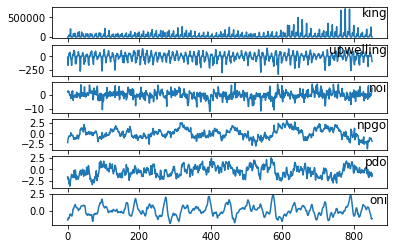

In [117]:
dataset = read_csv('master_data.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5]
i = 1
# plot each column
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(dataset.columns[group], y=.5, loc='right')
    i += 1
plt.show()

<h2>Make Series into Train and Test Set with inputs and ouptuts</h2>

In [118]:
# convert series to supervised learning
def series_to_supervised(data, n_in=6, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# load dataset
dataset = read_csv('master_data.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,1] = encoder.fit_transform(values[:,1])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
n_months = 6
n_features = 6
reframed = series_to_supervised(scaled, n_months, 1)
# drop columns we don't want to predict
# reframed.drop(reframed.columns[[13]], axis=1, inplace=True)
print(reframed.head())

    var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
6    0.000006   0.520913   0.710488   0.220877   0.329032   0.119048   
7    0.000006   0.079848   0.683284   0.332829   0.238710   0.166667   
8    0.000035   0.399240   0.731936   0.405446   0.283871   0.190476   
9    0.009241   0.566540   0.675895   0.422088   0.267742   0.166667   
10   0.070540   0.764259   0.689713   0.456883   0.074194   0.190476   

    var1(t-5)  var2(t-5)  var3(t-5)  var4(t-5)  ...  var3(t-1)  var4(t-1)  \
6    0.000006   0.079848   0.683284   0.332829  ...   0.632281   0.464448   
7    0.000035   0.399240   0.731936   0.405446  ...   0.567508   0.440242   
8    0.009241   0.566540   0.675895   0.422088  ...   0.572306   0.468986   
9    0.070540   0.764259   0.689713   0.456883  ...   0.591786   0.461422   
10   0.023221   0.703422   0.632281   0.464448  ...   0.461760   0.570348   

    var5(t-1)  var6(t-1)   var1(t)   var2(t)   var3(t)   var4(t)   var5(t)  \
6    0.182258   0.238095  

In [119]:
# split into train and test sets
values = reframed.values
n_train_months = 66 * 12 # MENTAL NOTE: IF ERROR IN MOTH TO YEAR CHECK THIS
train = values[:n_train_months, :]
test = values[n_train_months:, :]
# split into input and outputs
n_obs = n_months * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
# print(train_X.shape, len(train_X), train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_months, n_features))
test_X = test_X.reshape((test_X.shape[0], n_months, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(792, 6, 6) (792,) (54, 6, 6) (54,)


In [120]:
X_train, X_dev, y_train, y_dev = train_test_split(train_X, train_y, test_size=0.10, shuffle=False)

In [121]:
print(X_dev.shape)
print(y_dev.shape)
print(X_train.shape)
print(y_train.shape)
print(test_X.shape)
print(test_y.shape)

(80, 6, 6)
(80,)
(712, 6, 6)
(712,)
(54, 6, 6)
(54,)


Epoch 1/1000
1/1 - 7s - loss: 0.0143 - root_mean_squared_error: 0.1196 - val_loss: 0.0488 - val_root_mean_squared_error: 0.2209
Epoch 2/1000
1/1 - 0s - loss: 0.0115 - root_mean_squared_error: 0.1071 - val_loss: 0.0447 - val_root_mean_squared_error: 0.2114
Epoch 3/1000
1/1 - 0s - loss: 0.0099 - root_mean_squared_error: 0.0994 - val_loss: 0.0419 - val_root_mean_squared_error: 0.2046
Epoch 4/1000
1/1 - 0s - loss: 0.0093 - root_mean_squared_error: 0.0965 - val_loss: 0.0402 - val_root_mean_squared_error: 0.2005
Epoch 5/1000
1/1 - 0s - loss: 0.0095 - root_mean_squared_error: 0.0974 - val_loss: 0.0394 - val_root_mean_squared_error: 0.1985
Epoch 6/1000
1/1 - 0s - loss: 0.0099 - root_mean_squared_error: 0.0994 - val_loss: 0.0391 - val_root_mean_squared_error: 0.1978
Epoch 7/1000
1/1 - 0s - loss: 0.0101 - root_mean_squared_error: 0.1006 - val_loss: 0.0391 - val_root_mean_squared_error: 0.1978
Epoch 8/1000
1/1 - 0s - loss: 0.0101 - root_mean_squared_error: 0.1005 - val_loss: 0.0393 - val_root_mea

Epoch 40/1000
1/1 - 0s - loss: 0.0091 - root_mean_squared_error: 0.0955 - val_loss: 0.0417 - val_root_mean_squared_error: 0.2043
Epoch 41/1000
1/1 - 0s - loss: 0.0091 - root_mean_squared_error: 0.0955 - val_loss: 0.0418 - val_root_mean_squared_error: 0.2044
Epoch 42/1000
1/1 - 0s - loss: 0.0091 - root_mean_squared_error: 0.0954 - val_loss: 0.0418 - val_root_mean_squared_error: 0.2045
Epoch 43/1000
1/1 - 0s - loss: 0.0091 - root_mean_squared_error: 0.0954 - val_loss: 0.0418 - val_root_mean_squared_error: 0.2045
Epoch 44/1000
1/1 - 0s - loss: 0.0091 - root_mean_squared_error: 0.0954 - val_loss: 0.0418 - val_root_mean_squared_error: 0.2043
Epoch 45/1000
1/1 - 0s - loss: 0.0091 - root_mean_squared_error: 0.0954 - val_loss: 0.0417 - val_root_mean_squared_error: 0.2041
Epoch 46/1000
1/1 - 0s - loss: 0.0091 - root_mean_squared_error: 0.0953 - val_loss: 0.0416 - val_root_mean_squared_error: 0.2039
Epoch 47/1000
1/1 - 0s - loss: 0.0091 - root_mean_squared_error: 0.0952 - val_loss: 0.0415 - val_

Epoch 79/1000
1/1 - 0s - loss: 0.0087 - root_mean_squared_error: 0.0933 - val_loss: 0.0406 - val_root_mean_squared_error: 0.2015
Epoch 80/1000
1/1 - 0s - loss: 0.0087 - root_mean_squared_error: 0.0932 - val_loss: 0.0405 - val_root_mean_squared_error: 0.2013
Epoch 81/1000
1/1 - 0s - loss: 0.0087 - root_mean_squared_error: 0.0930 - val_loss: 0.0404 - val_root_mean_squared_error: 0.2010
Epoch 82/1000
1/1 - 0s - loss: 0.0086 - root_mean_squared_error: 0.0929 - val_loss: 0.0403 - val_root_mean_squared_error: 0.2008
Epoch 83/1000
1/1 - 0s - loss: 0.0086 - root_mean_squared_error: 0.0928 - val_loss: 0.0402 - val_root_mean_squared_error: 0.2006
Epoch 84/1000
1/1 - 0s - loss: 0.0086 - root_mean_squared_error: 0.0927 - val_loss: 0.0402 - val_root_mean_squared_error: 0.2005
Epoch 85/1000
1/1 - 0s - loss: 0.0086 - root_mean_squared_error: 0.0926 - val_loss: 0.0402 - val_root_mean_squared_error: 0.2004
Epoch 86/1000
1/1 - 0s - loss: 0.0085 - root_mean_squared_error: 0.0924 - val_loss: 0.0401 - val_

Epoch 118/1000
1/1 - 0s - loss: 0.0077 - root_mean_squared_error: 0.0879 - val_loss: 0.0359 - val_root_mean_squared_error: 0.1893
Epoch 119/1000
1/1 - 0s - loss: 0.0077 - root_mean_squared_error: 0.0878 - val_loss: 0.0358 - val_root_mean_squared_error: 0.1893
Epoch 120/1000
1/1 - 0s - loss: 0.0077 - root_mean_squared_error: 0.0877 - val_loss: 0.0358 - val_root_mean_squared_error: 0.1892
Epoch 121/1000
1/1 - 0s - loss: 0.0077 - root_mean_squared_error: 0.0876 - val_loss: 0.0358 - val_root_mean_squared_error: 0.1892
Epoch 122/1000
1/1 - 0s - loss: 0.0077 - root_mean_squared_error: 0.0875 - val_loss: 0.0358 - val_root_mean_squared_error: 0.1892
Epoch 123/1000
1/1 - 0s - loss: 0.0076 - root_mean_squared_error: 0.0874 - val_loss: 0.0358 - val_root_mean_squared_error: 0.1891
Epoch 124/1000
1/1 - 0s - loss: 0.0076 - root_mean_squared_error: 0.0873 - val_loss: 0.0357 - val_root_mean_squared_error: 0.1891
Epoch 125/1000
1/1 - 0s - loss: 0.0076 - root_mean_squared_error: 0.0872 - val_loss: 0.035

Epoch 157/1000
1/1 - 0s - loss: 0.0072 - root_mean_squared_error: 0.0848 - val_loss: 0.0339 - val_root_mean_squared_error: 0.1842
Epoch 158/1000
1/1 - 0s - loss: 0.0072 - root_mean_squared_error: 0.0848 - val_loss: 0.0339 - val_root_mean_squared_error: 0.1840
Epoch 159/1000
1/1 - 0s - loss: 0.0072 - root_mean_squared_error: 0.0847 - val_loss: 0.0338 - val_root_mean_squared_error: 0.1838
Epoch 160/1000
1/1 - 0s - loss: 0.0072 - root_mean_squared_error: 0.0846 - val_loss: 0.0338 - val_root_mean_squared_error: 0.1837
Epoch 161/1000
1/1 - 0s - loss: 0.0071 - root_mean_squared_error: 0.0845 - val_loss: 0.0337 - val_root_mean_squared_error: 0.1836
Epoch 162/1000
1/1 - 0s - loss: 0.0071 - root_mean_squared_error: 0.0844 - val_loss: 0.0336 - val_root_mean_squared_error: 0.1834
Epoch 163/1000
1/1 - 0s - loss: 0.0071 - root_mean_squared_error: 0.0843 - val_loss: 0.0336 - val_root_mean_squared_error: 0.1832
Epoch 164/1000
1/1 - 0s - loss: 0.0071 - root_mean_squared_error: 0.0843 - val_loss: 0.033

Epoch 196/1000
1/1 - 0s - loss: 0.0063 - root_mean_squared_error: 0.0794 - val_loss: 0.0306 - val_root_mean_squared_error: 0.1749
Epoch 197/1000
1/1 - 0s - loss: 0.0063 - root_mean_squared_error: 0.0791 - val_loss: 0.0305 - val_root_mean_squared_error: 0.1745
Epoch 198/1000
1/1 - 0s - loss: 0.0062 - root_mean_squared_error: 0.0789 - val_loss: 0.0304 - val_root_mean_squared_error: 0.1742
Epoch 199/1000
1/1 - 0s - loss: 0.0062 - root_mean_squared_error: 0.0785 - val_loss: 0.0302 - val_root_mean_squared_error: 0.1739
Epoch 200/1000
1/1 - 0s - loss: 0.0061 - root_mean_squared_error: 0.0782 - val_loss: 0.0301 - val_root_mean_squared_error: 0.1736
Epoch 201/1000
1/1 - 0s - loss: 0.0061 - root_mean_squared_error: 0.0779 - val_loss: 0.0300 - val_root_mean_squared_error: 0.1733
Epoch 202/1000
1/1 - 0s - loss: 0.0060 - root_mean_squared_error: 0.0776 - val_loss: 0.0299 - val_root_mean_squared_error: 0.1729
Epoch 203/1000
1/1 - 0s - loss: 0.0060 - root_mean_squared_error: 0.0772 - val_loss: 0.029

Epoch 235/1000
1/1 - 0s - loss: 0.0053 - root_mean_squared_error: 0.0727 - val_loss: 0.0266 - val_root_mean_squared_error: 0.1632
Epoch 236/1000
1/1 - 0s - loss: 0.0053 - root_mean_squared_error: 0.0725 - val_loss: 0.0267 - val_root_mean_squared_error: 0.1633
Epoch 237/1000
1/1 - 0s - loss: 0.0052 - root_mean_squared_error: 0.0724 - val_loss: 0.0266 - val_root_mean_squared_error: 0.1632
Epoch 238/1000
1/1 - 0s - loss: 0.0052 - root_mean_squared_error: 0.0723 - val_loss: 0.0265 - val_root_mean_squared_error: 0.1629
Epoch 239/1000
1/1 - 0s - loss: 0.0052 - root_mean_squared_error: 0.0722 - val_loss: 0.0264 - val_root_mean_squared_error: 0.1624
Epoch 240/1000
1/1 - 0s - loss: 0.0052 - root_mean_squared_error: 0.0721 - val_loss: 0.0264 - val_root_mean_squared_error: 0.1623
Epoch 241/1000
1/1 - 0s - loss: 0.0052 - root_mean_squared_error: 0.0720 - val_loss: 0.0263 - val_root_mean_squared_error: 0.1623
Epoch 242/1000
1/1 - 0s - loss: 0.0052 - root_mean_squared_error: 0.0719 - val_loss: 0.026

Epoch 274/1000
1/1 - 0s - loss: 0.0047 - root_mean_squared_error: 0.0687 - val_loss: 0.0239 - val_root_mean_squared_error: 0.1545
Epoch 275/1000
1/1 - 0s - loss: 0.0047 - root_mean_squared_error: 0.0686 - val_loss: 0.0238 - val_root_mean_squared_error: 0.1542
Epoch 276/1000
1/1 - 0s - loss: 0.0047 - root_mean_squared_error: 0.0685 - val_loss: 0.0237 - val_root_mean_squared_error: 0.1540
Epoch 277/1000
1/1 - 0s - loss: 0.0047 - root_mean_squared_error: 0.0684 - val_loss: 0.0236 - val_root_mean_squared_error: 0.1537
Epoch 278/1000
1/1 - 0s - loss: 0.0047 - root_mean_squared_error: 0.0683 - val_loss: 0.0235 - val_root_mean_squared_error: 0.1533
Epoch 279/1000
1/1 - 0s - loss: 0.0047 - root_mean_squared_error: 0.0682 - val_loss: 0.0234 - val_root_mean_squared_error: 0.1530
Epoch 280/1000
1/1 - 0s - loss: 0.0046 - root_mean_squared_error: 0.0681 - val_loss: 0.0233 - val_root_mean_squared_error: 0.1527
Epoch 281/1000
1/1 - 0s - loss: 0.0046 - root_mean_squared_error: 0.0680 - val_loss: 0.023

Epoch 313/1000
1/1 - 0s - loss: 0.0046 - root_mean_squared_error: 0.0682 - val_loss: 0.0214 - val_root_mean_squared_error: 0.1463
Epoch 314/1000
1/1 - 0s - loss: 0.0044 - root_mean_squared_error: 0.0660 - val_loss: 0.0222 - val_root_mean_squared_error: 0.1492
Epoch 315/1000
1/1 - 0s - loss: 0.0045 - root_mean_squared_error: 0.0668 - val_loss: 0.0203 - val_root_mean_squared_error: 0.1423
Epoch 316/1000
1/1 - 0s - loss: 0.0042 - root_mean_squared_error: 0.0651 - val_loss: 0.0202 - val_root_mean_squared_error: 0.1420
Epoch 317/1000
1/1 - 0s - loss: 0.0044 - root_mean_squared_error: 0.0665 - val_loss: 0.0210 - val_root_mean_squared_error: 0.1449
Epoch 318/1000
1/1 - 0s - loss: 0.0043 - root_mean_squared_error: 0.0654 - val_loss: 0.0214 - val_root_mean_squared_error: 0.1463
Epoch 319/1000
1/1 - 0s - loss: 0.0043 - root_mean_squared_error: 0.0658 - val_loss: 0.0201 - val_root_mean_squared_error: 0.1418
Epoch 320/1000
1/1 - 0s - loss: 0.0042 - root_mean_squared_error: 0.0651 - val_loss: 0.020

Epoch 352/1000
1/1 - 0s - loss: 0.0039 - root_mean_squared_error: 0.0627 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1369
Epoch 353/1000
1/1 - 0s - loss: 0.0039 - root_mean_squared_error: 0.0626 - val_loss: 0.0186 - val_root_mean_squared_error: 0.1362
Epoch 354/1000
1/1 - 0s - loss: 0.0039 - root_mean_squared_error: 0.0626 - val_loss: 0.0185 - val_root_mean_squared_error: 0.1360
Epoch 355/1000
1/1 - 0s - loss: 0.0039 - root_mean_squared_error: 0.0626 - val_loss: 0.0186 - val_root_mean_squared_error: 0.1365
Epoch 356/1000
1/1 - 0s - loss: 0.0039 - root_mean_squared_error: 0.0625 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1356
Epoch 357/1000
1/1 - 0s - loss: 0.0039 - root_mean_squared_error: 0.0623 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1356
Epoch 358/1000
1/1 - 0s - loss: 0.0039 - root_mean_squared_error: 0.0622 - val_loss: 0.0185 - val_root_mean_squared_error: 0.1358
Epoch 359/1000
1/1 - 0s - loss: 0.0039 - root_mean_squared_error: 0.0622 - val_loss: 0.018

Epoch 391/1000
1/1 - 0s - loss: 0.0036 - root_mean_squared_error: 0.0600 - val_loss: 0.0168 - val_root_mean_squared_error: 0.1296
Epoch 392/1000
1/1 - 0s - loss: 0.0036 - root_mean_squared_error: 0.0598 - val_loss: 0.0165 - val_root_mean_squared_error: 0.1284
Epoch 393/1000
1/1 - 0s - loss: 0.0035 - root_mean_squared_error: 0.0595 - val_loss: 0.0165 - val_root_mean_squared_error: 0.1286
Epoch 394/1000
1/1 - 0s - loss: 0.0035 - root_mean_squared_error: 0.0593 - val_loss: 0.0163 - val_root_mean_squared_error: 0.1278
Epoch 395/1000
1/1 - 0s - loss: 0.0035 - root_mean_squared_error: 0.0591 - val_loss: 0.0163 - val_root_mean_squared_error: 0.1276
Epoch 396/1000
1/1 - 0s - loss: 0.0035 - root_mean_squared_error: 0.0590 - val_loss: 0.0163 - val_root_mean_squared_error: 0.1278
Epoch 397/1000
1/1 - 0s - loss: 0.0035 - root_mean_squared_error: 0.0590 - val_loss: 0.0162 - val_root_mean_squared_error: 0.1273
Epoch 398/1000
1/1 - 0s - loss: 0.0035 - root_mean_squared_error: 0.0591 - val_loss: 0.016

Epoch 430/1000
1/1 - 0s - loss: 0.0033 - root_mean_squared_error: 0.0570 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1211
Epoch 431/1000
1/1 - 0s - loss: 0.0033 - root_mean_squared_error: 0.0571 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1214
Epoch 432/1000
1/1 - 0s - loss: 0.0032 - root_mean_squared_error: 0.0569 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1213
Epoch 433/1000
1/1 - 0s - loss: 0.0032 - root_mean_squared_error: 0.0566 - val_loss: 0.0143 - val_root_mean_squared_error: 0.1197
Epoch 434/1000
1/1 - 0s - loss: 0.0032 - root_mean_squared_error: 0.0567 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1211
Epoch 435/1000
1/1 - 0s - loss: 0.0032 - root_mean_squared_error: 0.0570 - val_loss: 0.0143 - val_root_mean_squared_error: 0.1196
Epoch 436/1000
1/1 - 0s - loss: 0.0032 - root_mean_squared_error: 0.0566 - val_loss: 0.0143 - val_root_mean_squared_error: 0.1194
Epoch 437/1000
1/1 - 0s - loss: 0.0031 - root_mean_squared_error: 0.0560 - val_loss: 0.014

Epoch 469/1000
1/1 - 0s - loss: 0.0030 - root_mean_squared_error: 0.0545 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1127
Epoch 470/1000
1/1 - 0s - loss: 0.0030 - root_mean_squared_error: 0.0544 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1139
Epoch 471/1000
1/1 - 0s - loss: 0.0030 - root_mean_squared_error: 0.0545 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1127
Epoch 472/1000
1/1 - 0s - loss: 0.0030 - root_mean_squared_error: 0.0544 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1128
Epoch 473/1000
1/1 - 0s - loss: 0.0029 - root_mean_squared_error: 0.0541 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1121
Epoch 474/1000
1/1 - 0s - loss: 0.0029 - root_mean_squared_error: 0.0539 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1118
Epoch 475/1000
1/1 - 0s - loss: 0.0029 - root_mean_squared_error: 0.0540 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1124
Epoch 476/1000
1/1 - 0s - loss: 0.0029 - root_mean_squared_error: 0.0540 - val_loss: 0.012

Epoch 508/1000
1/1 - 0s - loss: 0.0030 - root_mean_squared_error: 0.0551 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1086
Epoch 509/1000
1/1 - 0s - loss: 0.0029 - root_mean_squared_error: 0.0536 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1092
Epoch 510/1000
1/1 - 0s - loss: 0.0028 - root_mean_squared_error: 0.0533 - val_loss: 0.0114 - val_root_mean_squared_error: 0.1070
Epoch 511/1000
1/1 - 0s - loss: 0.0028 - root_mean_squared_error: 0.0524 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1064
Epoch 512/1000
1/1 - 0s - loss: 0.0028 - root_mean_squared_error: 0.0527 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1085
Epoch 513/1000
1/1 - 0s - loss: 0.0028 - root_mean_squared_error: 0.0532 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1057
Epoch 514/1000
1/1 - 0s - loss: 0.0027 - root_mean_squared_error: 0.0523 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1056
Epoch 515/1000
1/1 - 0s - loss: 0.0027 - root_mean_squared_error: 0.0523 - val_loss: 0.011

Epoch 547/1000
1/1 - 0s - loss: 0.0027 - root_mean_squared_error: 0.0519 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1033
Epoch 548/1000
1/1 - 0s - loss: 0.0026 - root_mean_squared_error: 0.0514 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1061
Epoch 549/1000
1/1 - 0s - loss: 0.0027 - root_mean_squared_error: 0.0521 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1016
Epoch 550/1000
1/1 - 0s - loss: 0.0027 - root_mean_squared_error: 0.0515 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1035
Epoch 551/1000
1/1 - 0s - loss: 0.0027 - root_mean_squared_error: 0.0520 - val_loss: 0.0110 - val_root_mean_squared_error: 0.1049
Epoch 552/1000
1/1 - 0s - loss: 0.0027 - root_mean_squared_error: 0.0519 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1011
Epoch 553/1000
1/1 - 0s - loss: 0.0027 - root_mean_squared_error: 0.0518 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1038
Epoch 554/1000
1/1 - 0s - loss: 0.0027 - root_mean_squared_error: 0.0522 - val_loss: 0.010

Epoch 586/1000
1/1 - 0s - loss: 0.0024 - root_mean_squared_error: 0.0487 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1041
Epoch 587/1000
1/1 - 0s - loss: 0.0029 - root_mean_squared_error: 0.0538 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1099
Epoch 588/1000
1/1 - 0s - loss: 0.0029 - root_mean_squared_error: 0.0540 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0986
Epoch 589/1000
1/1 - 0s - loss: 0.0024 - root_mean_squared_error: 0.0490 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1004
Epoch 590/1000
1/1 - 0s - loss: 0.0025 - root_mean_squared_error: 0.0499 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1014
Epoch 591/1000
1/1 - 0s - loss: 0.0027 - root_mean_squared_error: 0.0516 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1021
Epoch 592/1000
1/1 - 0s - loss: 0.0026 - root_mean_squared_error: 0.0512 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0977
Epoch 593/1000
1/1 - 0s - loss: 0.0024 - root_mean_squared_error: 0.0486 - val_loss: 0.010

Epoch 625/1000
1/1 - 0s - loss: 0.0028 - root_mean_squared_error: 0.0525 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1043
Epoch 626/1000
1/1 - 0s - loss: 0.0026 - root_mean_squared_error: 0.0512 - val_loss: 0.0105 - val_root_mean_squared_error: 0.1023
Epoch 627/1000
1/1 - 0s - loss: 0.0029 - root_mean_squared_error: 0.0539 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1038
Epoch 628/1000
1/1 - 0s - loss: 0.0031 - root_mean_squared_error: 0.0554 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0996
Epoch 629/1000
1/1 - 0s - loss: 0.0024 - root_mean_squared_error: 0.0494 - val_loss: 0.0143 - val_root_mean_squared_error: 0.1196
Epoch 630/1000
1/1 - 0s - loss: 0.0031 - root_mean_squared_error: 0.0556 - val_loss: 0.0153 - val_root_mean_squared_error: 0.1237
Epoch 631/1000
1/1 - 0s - loss: 0.0032 - root_mean_squared_error: 0.0568 - val_loss: 0.0143 - val_root_mean_squared_error: 0.1198
Epoch 632/1000
1/1 - 0s - loss: 0.0031 - root_mean_squared_error: 0.0554 - val_loss: 0.009

Epoch 664/1000
1/1 - 0s - loss: 0.0025 - root_mean_squared_error: 0.0497 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0964
Epoch 665/1000
1/1 - 0s - loss: 0.0023 - root_mean_squared_error: 0.0479 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0963
Epoch 666/1000
1/1 - 0s - loss: 0.0025 - root_mean_squared_error: 0.0502 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0950
Epoch 667/1000
1/1 - 0s - loss: 0.0023 - root_mean_squared_error: 0.0480 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0962
Epoch 668/1000
1/1 - 0s - loss: 0.0023 - root_mean_squared_error: 0.0479 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0952
Epoch 669/1000
1/1 - 0s - loss: 0.0023 - root_mean_squared_error: 0.0475 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0957
Epoch 670/1000
1/1 - 0s - loss: 0.0023 - root_mean_squared_error: 0.0476 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0952
Epoch 671/1000
1/1 - 0s - loss: 0.0023 - root_mean_squared_error: 0.0476 - val_loss: 0.008

Epoch 703/1000
1/1 - 0s - loss: 0.0023 - root_mean_squared_error: 0.0485 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0914
Epoch 704/1000
1/1 - 0s - loss: 0.0022 - root_mean_squared_error: 0.0466 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0938
Epoch 705/1000
1/1 - 0s - loss: 0.0025 - root_mean_squared_error: 0.0498 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0898
Epoch 706/1000
1/1 - 0s - loss: 0.0021 - root_mean_squared_error: 0.0456 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0999
Epoch 707/1000
1/1 - 0s - loss: 0.0024 - root_mean_squared_error: 0.0493 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0883
Epoch 708/1000
1/1 - 0s - loss: 0.0020 - root_mean_squared_error: 0.0453 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0913
Epoch 709/1000
1/1 - 0s - loss: 0.0022 - root_mean_squared_error: 0.0467 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0909
Epoch 710/1000
1/1 - 0s - loss: 0.0022 - root_mean_squared_error: 0.0466 - val_loss: 0.007

Epoch 742/1000
1/1 - 0s - loss: 0.0019 - root_mean_squared_error: 0.0435 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0821
Epoch 743/1000
1/1 - 0s - loss: 0.0019 - root_mean_squared_error: 0.0438 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0811
Epoch 744/1000
1/1 - 0s - loss: 0.0019 - root_mean_squared_error: 0.0434 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0819
Epoch 745/1000
1/1 - 0s - loss: 0.0019 - root_mean_squared_error: 0.0436 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0809
Epoch 746/1000
1/1 - 0s - loss: 0.0019 - root_mean_squared_error: 0.0433 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0810
Epoch 747/1000
1/1 - 0s - loss: 0.0019 - root_mean_squared_error: 0.0434 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0801
Epoch 748/1000
1/1 - 0s - loss: 0.0019 - root_mean_squared_error: 0.0431 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0805
Epoch 749/1000
1/1 - 0s - loss: 0.0019 - root_mean_squared_error: 0.0432 - val_loss: 0.006

Epoch 781/1000
1/1 - 0s - loss: 0.0017 - root_mean_squared_error: 0.0417 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0764
Epoch 782/1000
1/1 - 0s - loss: 0.0018 - root_mean_squared_error: 0.0420 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0766
Epoch 783/1000
1/1 - 0s - loss: 0.0018 - root_mean_squared_error: 0.0420 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0760
Epoch 784/1000
1/1 - 0s - loss: 0.0017 - root_mean_squared_error: 0.0418 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0760
Epoch 785/1000
1/1 - 0s - loss: 0.0017 - root_mean_squared_error: 0.0415 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0758
Epoch 786/1000
1/1 - 0s - loss: 0.0017 - root_mean_squared_error: 0.0414 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0756
Epoch 787/1000
1/1 - 0s - loss: 0.0017 - root_mean_squared_error: 0.0415 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0757
Epoch 788/1000
1/1 - 0s - loss: 0.0017 - root_mean_squared_error: 0.0416 - val_loss: 0.005

Epoch 820/1000
1/1 - 0s - loss: 0.0023 - root_mean_squared_error: 0.0476 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0771
Epoch 821/1000
1/1 - 0s - loss: 0.0022 - root_mean_squared_error: 0.0471 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0774
Epoch 822/1000
1/1 - 0s - loss: 0.0021 - root_mean_squared_error: 0.0463 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0798
Epoch 823/1000
1/1 - 0s - loss: 0.0018 - root_mean_squared_error: 0.0426 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0777
Epoch 824/1000
1/1 - 0s - loss: 0.0019 - root_mean_squared_error: 0.0431 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0770
Epoch 825/1000
1/1 - 0s - loss: 0.0021 - root_mean_squared_error: 0.0459 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0744
Epoch 826/1000
1/1 - 0s - loss: 0.0019 - root_mean_squared_error: 0.0431 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0782
Epoch 827/1000
1/1 - 0s - loss: 0.0017 - root_mean_squared_error: 0.0417 - val_loss: 0.006

Epoch 859/1000
1/1 - 0s - loss: 0.0016 - root_mean_squared_error: 0.0394 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0703
Epoch 860/1000
1/1 - 0s - loss: 0.0016 - root_mean_squared_error: 0.0395 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0703
Epoch 861/1000
1/1 - 0s - loss: 0.0016 - root_mean_squared_error: 0.0396 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0700
Epoch 862/1000
1/1 - 0s - loss: 0.0015 - root_mean_squared_error: 0.0393 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0699
Epoch 863/1000
1/1 - 0s - loss: 0.0015 - root_mean_squared_error: 0.0394 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0700
Epoch 864/1000
1/1 - 0s - loss: 0.0015 - root_mean_squared_error: 0.0394 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0699
Epoch 865/1000
1/1 - 0s - loss: 0.0015 - root_mean_squared_error: 0.0392 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0698
Epoch 866/1000
1/1 - 0s - loss: 0.0015 - root_mean_squared_error: 0.0393 - val_loss: 0.004

Epoch 898/1000
1/1 - 0s - loss: 0.0016 - root_mean_squared_error: 0.0398 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0690
Epoch 899/1000
1/1 - 0s - loss: 0.0016 - root_mean_squared_error: 0.0395 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0696
Epoch 900/1000
1/1 - 0s - loss: 0.0015 - root_mean_squared_error: 0.0393 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0713
Epoch 901/1000
1/1 - 0s - loss: 0.0016 - root_mean_squared_error: 0.0400 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0685
Epoch 902/1000
1/1 - 0s - loss: 0.0016 - root_mean_squared_error: 0.0394 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0691
Epoch 903/1000
1/1 - 0s - loss: 0.0016 - root_mean_squared_error: 0.0398 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0695
Epoch 904/1000
1/1 - 0s - loss: 0.0015 - root_mean_squared_error: 0.0393 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0715
Epoch 905/1000
1/1 - 0s - loss: 0.0016 - root_mean_squared_error: 0.0396 - val_loss: 0.004

Epoch 937/1000
1/1 - 0s - loss: 0.0014 - root_mean_squared_error: 0.0380 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0670
Epoch 938/1000
1/1 - 0s - loss: 0.0014 - root_mean_squared_error: 0.0379 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0669
Epoch 939/1000
1/1 - 0s - loss: 0.0014 - root_mean_squared_error: 0.0378 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0668
Epoch 940/1000
1/1 - 0s - loss: 0.0014 - root_mean_squared_error: 0.0379 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0670
Epoch 941/1000
1/1 - 0s - loss: 0.0014 - root_mean_squared_error: 0.0379 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0668
Epoch 942/1000
1/1 - 0s - loss: 0.0014 - root_mean_squared_error: 0.0378 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0666
Epoch 943/1000
1/1 - 0s - loss: 0.0014 - root_mean_squared_error: 0.0377 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0667
Epoch 944/1000
1/1 - 0s - loss: 0.0014 - root_mean_squared_error: 0.0378 - val_loss: 0.004

Epoch 976/1000
1/1 - 0s - loss: 0.0014 - root_mean_squared_error: 0.0373 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0658
Epoch 977/1000
1/1 - 0s - loss: 0.0014 - root_mean_squared_error: 0.0373 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0654
Epoch 978/1000
1/1 - 0s - loss: 0.0014 - root_mean_squared_error: 0.0372 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0655
Epoch 979/1000
1/1 - 0s - loss: 0.0014 - root_mean_squared_error: 0.0371 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0653
Epoch 980/1000
1/1 - 0s - loss: 0.0014 - root_mean_squared_error: 0.0371 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0654
Epoch 981/1000
1/1 - 0s - loss: 0.0014 - root_mean_squared_error: 0.0371 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0653
Epoch 982/1000
1/1 - 0s - loss: 0.0014 - root_mean_squared_error: 0.0373 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0656
Epoch 983/1000
1/1 - 0s - loss: 0.0014 - root_mean_squared_error: 0.0374 - val_loss: 0.004

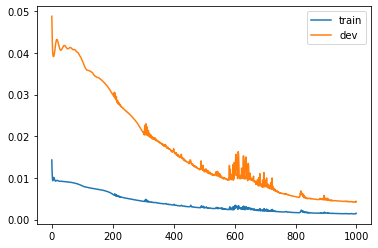

In [122]:
# design network
model = Sequential()
model.add(GRU(50, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(GRU(50, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(GRU(50, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(GRU(1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',  metrics=[tf.keras.metrics.RootMeanSquaredError()])
# fit network
#  
history = model.fit(train_X, train_y, epochs=1000, batch_size=1000, validation_data=(X_dev, y_dev), verbose=2, shuffle=False, callbacks=[model_checkpoint_callback])
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='dev')
plt.legend()
plt.show()

In [123]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_months*n_features))

In [124]:
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -5:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -5:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [125]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -5:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [126]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Chinook Count')
    plt.plot(predicted, color='blue',label='Predicted Chinook Count')
    plt.title('Chinook Population Prediction')
    plt.xlabel('Time')
    plt.ylabel('Chinook Count')
    plt.legend()
    plt.show()
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()
def month_to_year(month_preds):
    month_preds = month_preds[6:]
    year_preds = []
    for i in range(12, len(month_preds) + 1, 12):   
        salmon_count = np.sum(month_preds[i - 12:i])
        year_preds.append(salmon_count)
    year_preds = pd.DataFrame(year_preds, columns = ["Count"])
    return year_preds

def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The test root mean squared error is {}.".format(rmse))

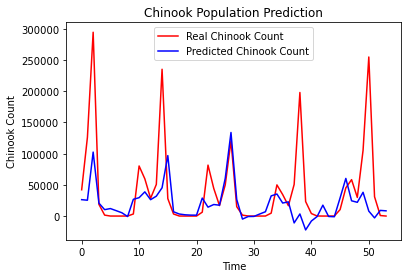

The test root mean squared error is 62766.86208502063.


In [127]:
plot_predictions(inv_y, inv_yhat)
return_rmse(inv_y, inv_yhat)

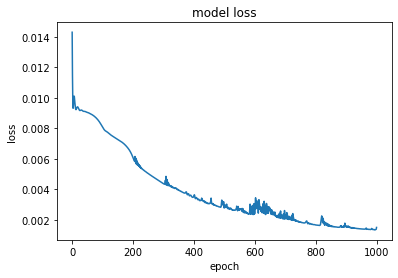

In [128]:
plot_loss(history)

In [129]:
preds = month_to_year(inv_yhat).astype(np.int64)
actual = month_to_year(inv_y).astype(np.int64)
print(preds)
print(actual)

    Count
0  318737
1  299330
2   82255
3  212019
    Count
0  488981
1  336030
2  381773
3  535746


In [130]:
bs_chris_path = '/Users/chrisshell/Desktop/Stanford/SalmonData/Use Data/Forecast Data Update.csv'
bs_ismael_path = '/Users/ismaelcastro/Documents/Computer Science/CS Classes/CS230/project/forecast_data_17_20.csv'
bs_abdul_path = '/Users/abdul/Downloads/SalmonNet/Forecast Data Update.csv'
baseline_data = pd.read_csv(bs_abdul_path)
traditional = pd.DataFrame(baseline_data["Count"])
print(traditional)

    Count
0  498710
1  439060
2  294840
3  347600


In [131]:
return_rmse(actual, traditional)

The test root mean squared error is 115829.72216361394.


In [132]:
return_rmse(actual, preds)

The test root mean squared error is 237086.54136675494.


In [133]:
# def create_train_test(king_all):
#     king_training_parse = king_all['date'].apply(pd.Timestamp) <= pd.Timestamp('12/31/2015')
#     king_training = king_all[king_training_parse]
#     king_training = king_training.reset_index()
#     king_training = king_training.drop('index', axis=1)
    
#     king_test_parse = king_all['date'].apply(pd.Timestamp) > pd.Timestamp('12/31/2015')
#     king_test = king_all[king_test_parse]
#     king_test = king_test.reset_index()
#     king_test = king_test.drop('index', axis=1)
#     print(king_test.shape)
    
#     # Normalizing Data
#     king_training[king_training["king"] < 0] = 0 
# #     print('max val king_train:')
#     print(max(king_training['king']))
#     king_test[king_test["king"] < 0] = 0
# #     print('max val king_test:')
#     print(max(king_test['king']))
#     king_train_pre = king_training["king"].to_frame()
# #     print(king_train_norm)
#     king_test_pre = king_test["king"].to_frame()
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     king_train_norm = scaler.fit_transform(king_train_pre)
#     king_test_norm = scaler.fit_transform(king_test_pre)
#     print('king_test_norm')
#     print(king_test_norm.shape)
#     print('king_train_norm')
#     print(king_train_norm.shape)
#     #king_train_norm = (king_training["king"] - np.min(king_training["king"])) / (np.max(king_training["king"]) - np.min(king_training["king"]))
#     #print(type(king_train_norm))
#     #king_train_norm = king_train_norm.to_frame()
#     x_train = []
#     y_train = []
#     x_test = []
#     y_test = []
#     y_test_not_norm = []
#     y_train_not_norm = []
    
#     # Todo: Experiment with input size of input (ex. 30 days)
    
#     for i in range(6,924): # 30
#         x_train.append(king_train_norm[i-6:i])
#         y_train.append(king_train_norm[i])
#     for i in range(6, 60):
#         x_test.append(king_test_norm[i-6:i])
#         y_test.append(king_test_norm[i])
    
#     # make y_test_not_norm
#     for i in range(6, 60):
#         y_test_not_norm.append(king_test['king'][i])
#     for i in range(6,924): # 30
#         y_train_not_norm.append(king_training['king'][i])
        
#     return x_train, y_train, x_test, y_test, scaler, y_test_not_norm, y_train_not_norm

In [134]:
x_train, y_train, x_test, y_test, scaler, y_test_not_norm, y_train_not_norm = create_train_test(data_copy)
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1)).astype(np.float32)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
y_train = np.array(y_train)
y_test = np.array(y_test)
y_test_not_norm = np.array(y_test_not_norm)
print(y_test.shape)
y_test_not_norm = y_test_not_norm.reshape((y_test_not_norm.shape[0], 1))
print(y_test_not_norm.shape)
y_train_not_norm = np.array(y_train_not_norm)
y_train_not_norm = y_train_not_norm.reshape((y_train_not_norm.shape[0], 1))
print(y_train_not_norm.shape)
print(y_train.shape)


NameError: name 'create_train_test' is not defined

In [ ]:
# def load_pdo(pathname):
#     pdo_data = pd.read_csv(pathname)
# #     print(pdo_data.head())
#     return pdo_data

In [ ]:
# ismael_path_pdo = '/Users/ismaelcastro/Documents/Computer Science/CS Classes/CS230/project/pdo.csv'
# pdo_data = load_pdo(ismael_path_pdo)

In [ ]:
# pdo = pdo_data["PDO"]
# data_copy = data_copy.join(pdo)

In [ ]:
# pdo_data

In [ ]:
# print(data_copy)